In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

/home/liuchao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 计算协方差矩阵，特征值及特征向量
import numpy as np
cov_mat = np.cov(X_train_std, rowvar=False)
eig_vals, eig_vects = np.linalg.eig(cov_mat)
print(eig_vals)
print(eig_vects)

[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]
[[ 1.46698114e-01  5.04170789e-01 -1.17235150e-01  2.06254611e-01
  -1.87815947e-01 -1.48851318e-01 -1.79263662e-01 -5.54687162e-02
  -4.03054922e-01 -4.17197583e-01  2.75660860e-01  4.03567189e-01
   4.13320786e-04]
 [-2.42245536e-01  2.42168894e-01  1.49946576e-01  1.30489298e-01
   5.68639776e-01 -2.69052764e-01 -5.92636731e-01  3.32731614e-02
  -1.01833706e-01  2.17101488e-01 -8.13845005e-02 -1.52474999e-01
  -8.78560762e-02]
 [-2.99344215e-02  2.86984836e-01  6.56394387e-01  1.51536318e-02
  -2.99209426e-01 -9.33386061e-02  6.07334578e-02 -1.00618575e-01
   3.51841423e-01  1.28549846e-01 -1.29751275e-02  1.68376064e-01
  -4.52518598e-01]
 [-2.55190023e-01 -6.46871827e-02  5.84282337e-01 -9.04220851e-02
  -4.12499478e-02 -1.01342392e-01  2.50323869e-01  5.61658566e-02
  -5.00457282e-01  4.73344124e-02  9.89088030e-02 -6.70902926e-02
   4

In [3]:
tot = np.sum(eig_vals)
var_exp = [i / tot for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) # 累加后组成的序列

In [4]:
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_result(X, y, test_idx=None, resolution=0.02, classifier=None):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1min = X[:,0].min() - 1
    x1max = X[:,0].max() + 1
    x2min = X[:,1].min() - 1
    x2max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='y', alpha=1.0, linewidth=1, marker='v', s=55, label="test set")

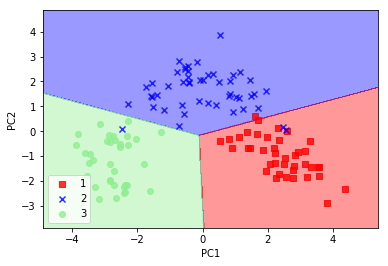

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std) # 使用训练集的特征向量转化测试集
lr.fit(X_train_pca, y_train)
plot_result(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

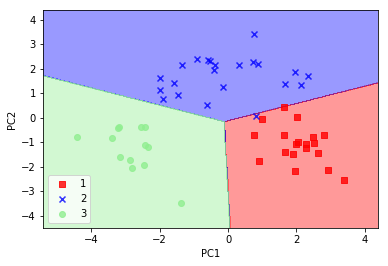

In [7]:
plot_result(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [8]:
pca = PCA(n_components=None) # 得到所有主成分的方差贡献率
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

In [10]:
# LDA(线性判别分析)
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n'%(label, mean_vecs[label-1]))


MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [11]:
"""核主成分分析"""
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean') # 求X中每两个样本间的距离
    mat_sq_dist = squareform(sq_dists) # 将距离转换为矩阵
    K = exp(-gamma * mat_sq_dist) # 求核矩阵
    # 对核矩阵进行聚集处理
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # 获得K最大的几个特征值及特征向量
    eigvals, eigvecs = eigh(K) # eigh为排序后的结果（升序）
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components+1))) # W(降维后的特征向量组成的矩阵)
    
    return X_pc


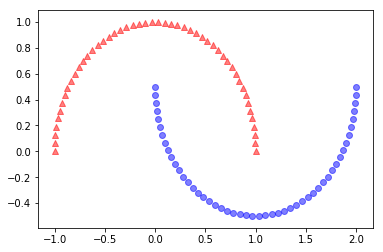

In [13]:
# 分离月半型数据
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

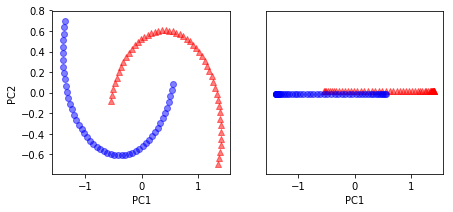

In [14]:
"""标准PCA"""
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_SPCA = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_SPCA[y==0, 0], X_SPCA[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_SPCA[y==1, 0], X_SPCA[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_SPCA[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5) # 只取某一个特征
ax[1].scatter(X_SPCA[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5) # 只取一个特征
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

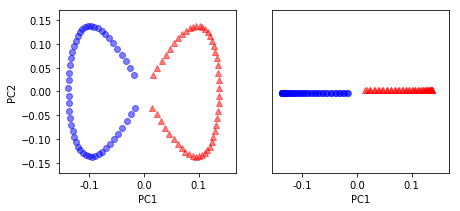

In [34]:
"""核PCA"""
from matplotlib.ticker import FormatStrFormatter

x_kpca = rbf_kernel_pca(X, gamma=20, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(x_kpca[y==0, 0], x_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(x_kpca[y==1, 0], x_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(x_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5) # 只取某一个特征
ax[1].scatter(x_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5) # 只取一个特征
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

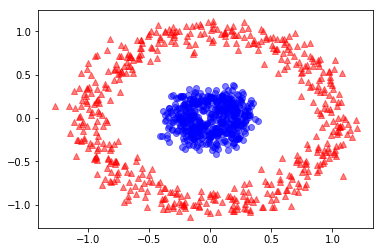

In [36]:
# 分离同心圆
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

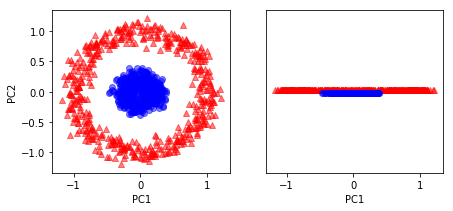

In [38]:
"""标准PCA"""
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_SPCA = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_SPCA[y==0, 0], X_SPCA[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_SPCA[y==1, 0], X_SPCA[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_SPCA[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5) # 只取某一个特征
ax[1].scatter(X_SPCA[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5) # 只取一个特征
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

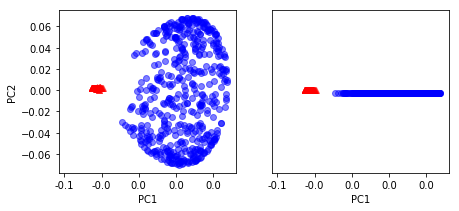

In [40]:
"""核PCA"""
from matplotlib.ticker import FormatStrFormatter

x_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(x_kpca[y==0, 0], x_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(x_kpca[y==1, 0], x_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(x_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5) # 只取某一个特征
ax[1].scatter(x_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5) # 只取一个特征
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

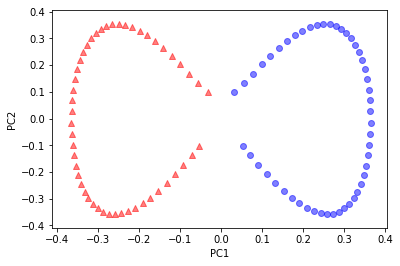

In [42]:
# sklearn中的核主成分分析
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
sickit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = sickit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()